In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [33]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [35]:
print("Customers Dataset:")
print(customers.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [37]:
print("Products Dataset:")
print(products.head(), "\n")

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [39]:
print("Transactions Dataset:")
print(transactions.head(), "\n")

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68   



In [41]:
print("Customers Info:")
print(customers.info(), "\n")

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 



In [47]:
print("products Infos:")
print(products.info(),"\n")

products Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 



In [49]:
print("Missing Values in Customers Dataset:")
print(customers.isnull().sum(), "\n")

Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 



In [51]:
print("Missing Values in Products Dataset:")
print(products.isnull().sum(), "\n")


Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 



In [53]:
print("Missing Values in Transactions Dataset:")
print(transactions.isnull().sum(), "\n")

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [57]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

In [59]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

In [61]:
discrepant_customers = set(transactions['CustomerID']) - set(customers['CustomerID'])
print(f"Discrepant CustomerIDs: {discrepant_customers}\n")

Discrepant CustomerIDs: set()



In [63]:
discrepant_products = set(transactions['ProductID']) - set(products['ProductID'])
print(f"Discrepant ProductIDs: {discrepant_products}\n")

Discrepant ProductIDs: set()



In [65]:
print("Customer Distribution by Region:")
customer_region = customers['Region'].value_counts()
print(customer_region)

Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


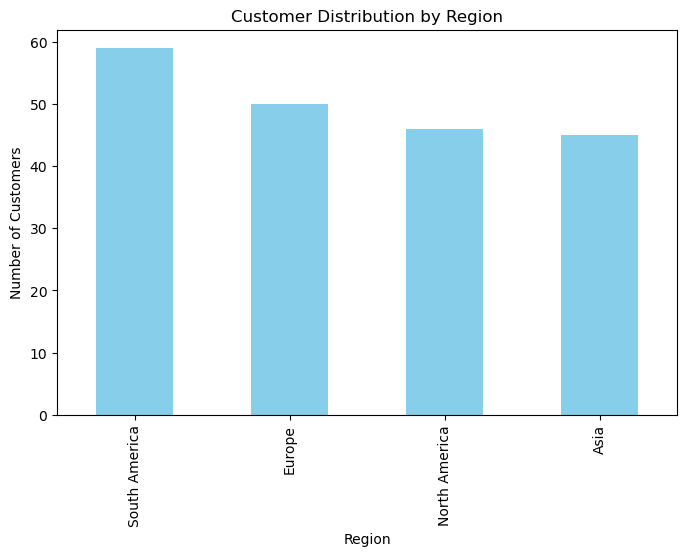

In [67]:
plt.figure(figsize=(8, 5))
customer_region.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

In [69]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print("Signup Trends:")
print(signup_trends)

Signup Trends:
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


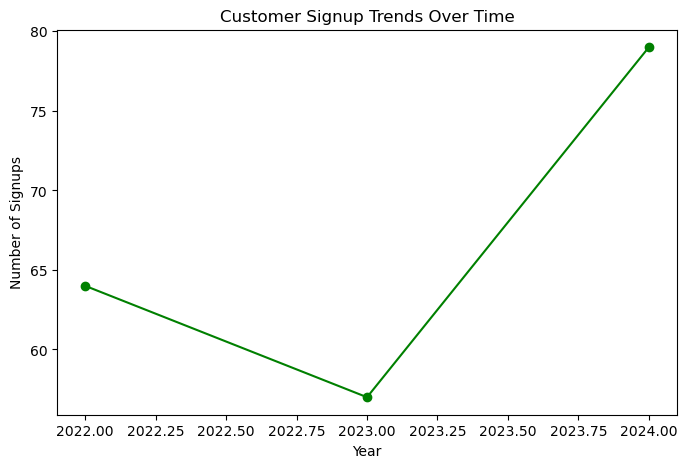

In [71]:
plt.figure(figsize=(8, 5))
signup_trends.plot(kind='line', marker='o', color='green')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

In [75]:
print("Top Product Categories:")
product_categories = products['Category'].value_counts()
print(product_categories)

Top Product Categories:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


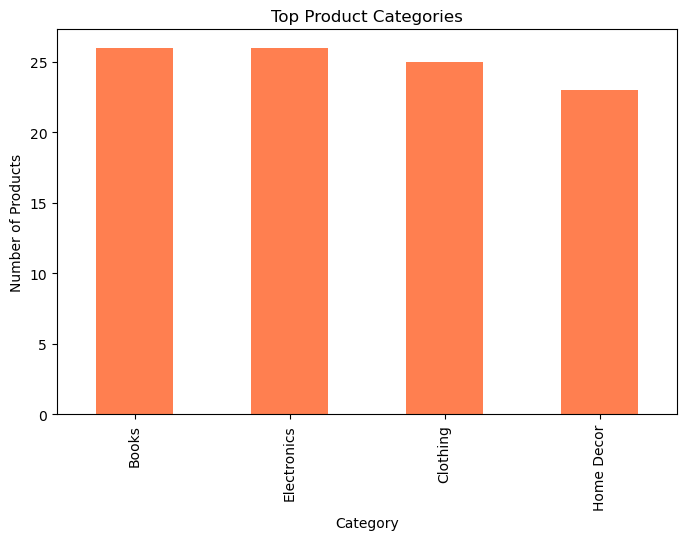

In [77]:
plt.figure(figsize=(8, 5))
product_categories.plot(kind='bar', color='coral')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [79]:
print("Product Price Distribution:")
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=30, kde=True, color='purple')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Product Price Distribution:


In [81]:
print("Sales Trends Over Time:")
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trends = transactions.groupby('TransactionYearMonth')['TotalValue'].sum()
print(sales_trends)

Sales Trends Over Time:
TransactionYearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


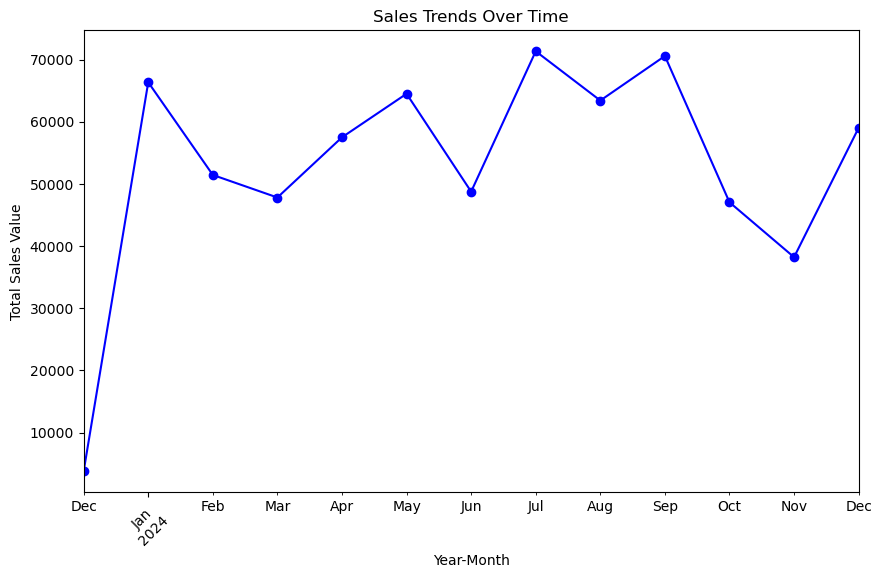

In [83]:
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

In [85]:
print("Top-Selling Products:")
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

Top-Selling Products:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


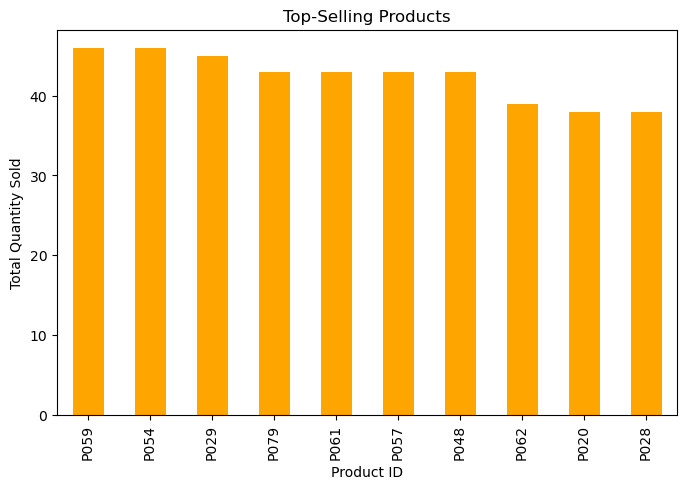

In [87]:
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='orange')
plt.title('Top-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()